In [ ]:
#importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

!pip install kaggle
import json
import os
import zipfile

In [ ]:
#creating json file to store/access my Kaggle API credentials
api_token = {
    "username": "j******6",
    "key": "8*******************7"
}
with open('/content/kaggle.json', 'w') as file:
    json.dump(api_token, file)
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

#setting up permissions for my Kaggle API key file
os.chmod('/content/kaggle.json', 600)

#downloading the dataset using the Kaggle CLI
!kaggle datasets download -d prasad22/retail-transactions-dataset

#unzipping the downloaded Kaggle dataset (https://www.kaggle.com/datasets/prasad22/retail-transactions-dataset)
zip_file_path = '/content/retail-transactions-dataset.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

retail-transactions-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#loading the CSV file into a dataframe and dropping the last two columns
df = pd.read_csv('/content/Retail_Transactions_Dataset.csv')

#converting the 'Product' column to a list of items and cleaning up the brackets and quotes
df['Product'] = df['Product'].apply(lambda x: literal_eval(x.replace("'", "\"")))
df['Product'] = df['Product'].apply(lambda x: [item.strip("[]'") for item in x])

df

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2020-12-21 19:42:52,Cheyenne Newman,[Hair Gel],6,12.77,Debit Card,New York,Convenience Store,True,Student,Winter,None
1,1000000001,2020-07-06 07:45:16,Emily Fitzgerald,"[Tuna, Bread, Tissues, Trash Bags]",5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2021-10-02 06:28:44,Michael Webb,"[Jam, Soap, Ketchup]",7,47.02,Debit Card,Miami,Convenience Store,False,Young Adult,Winter,None
3,1000000003,2022-01-10 05:39:02,Kimberly Lin,[BBQ Sauce],9,83.86,Mobile Payment,Seattle,Warehouse Club,True,Senior Citizen,Summer,Discount on Selected Items
4,1000000004,2021-10-13 07:28:47,Cathy Hernandez,"[Hand Sanitizer, Bread, Extension Cords, Ice C...",4,30.55,Debit Card,Houston,Warehouse Club,False,Senior Citizen,Spring,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1000029995,2023-10-16 06:01:01,Candice Wilson,"[Butter, Tuna, Vinegar, Shower Gel, Orange]",7,31.74,Debit Card,New York,Supermarket,True,Professional,Spring,Discount on Selected Items
29996,1000029996,2020-04-08 17:31:16,Jay Yu,[Honey],8,5.84,Cash,Chicago,Pharmacy,True,Professional,Summer,Discount on Selected Items
29997,1000029997,2020-12-18 07:10:45,Larry Miller,"[Ironing Board, Toothbrush]",7,51.10,Credit Card,Los Angeles,Supermarket,True,Young Adult,Fall,Discount on Selected Items
29998,1000029998,2020-02-28 00:29:39,Jeremy Foster,"[Broom, Lawn Mower]",7,65.67,Mobile Payment,Seattle,Department Store,True,Retiree,Summer,BOGO (Buy One Get One)


Exploratory Data Analysis (EDA) and Visualization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     30000 non-null  int64  
 1   Date               30000 non-null  object 
 2   Customer_Name      30000 non-null  object 
 3   Product            30000 non-null  object 
 4   Total_Items        30000 non-null  int64  
 5   Total_Cost         30000 non-null  float64
 6   Payment_Method     30000 non-null  object 
 7   City               30000 non-null  object 
 8   Store_Type         30000 non-null  object 
 9   Discount_Applied   30000 non-null  bool   
 10  Customer_Category  30000 non-null  object 
 11  Season             30000 non-null  object 
 12  Promotion          30000 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 2.8+ MB


In [ ]:
#checking for missing values within the datset
df.isnull().sum()

Transaction_ID       0
Date                 0
Customer_Name        0
Product              0
Total_Items          0
Total_Cost           0
Payment_Method       0
City                 0
Store_Type           0
Discount_Applied     0
Customer_Category    0
Season               0
Promotion            0
dtype: int64

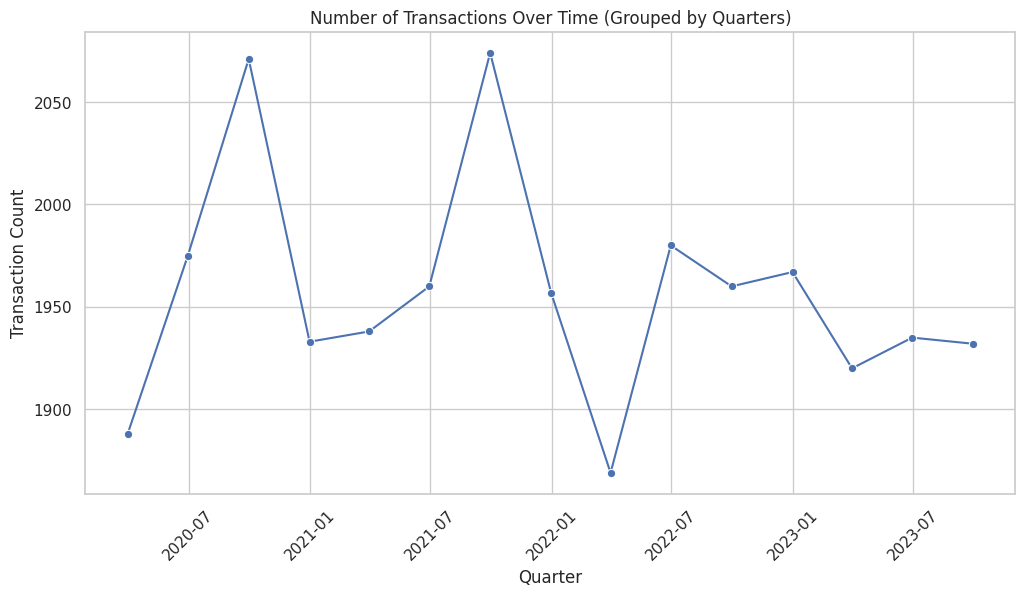

In [ ]:
#converting 'Date' into a datetime data type
df['Date'] = pd.to_datetime(df['Date'])

#grouping by quarters and count the transactions
transactions_per_quarter = df.resample('Q', on='Date')['Transaction_ID'].count().reset_index()

#removing the last quarter due to lack of data
transactions_per_quarter = transactions_per_quarter[:-1]

#setting the style of seaborn
sns.set(style="whitegrid")

#creating a line plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=transactions_per_quarter, x='Date', y='Transaction_ID', marker='o')
plt.xlabel('Quarter')
plt.ylabel('Transaction Count')
plt.title('Number of Transactions Over Time (Grouped by Quarters)')

#rotating x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


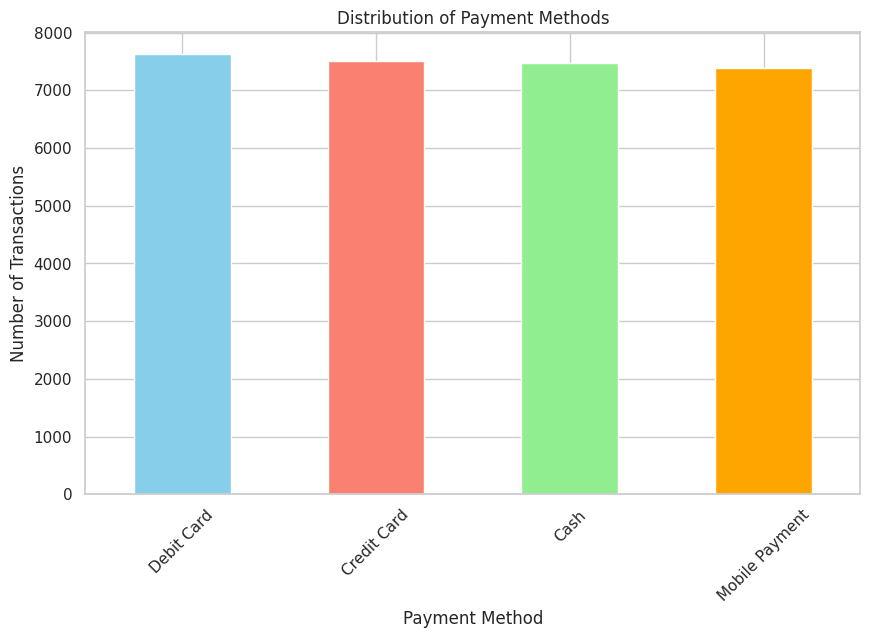

In [ ]:
#counting the occurrences of each payment method
payment_method_counts = df['Payment_Method'].value_counts()

#defining colors for each payment method
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'cornflowerblue', 'lightseagreen']

#plotting a basic bar graph with different colors for each bar
plt.figure(figsize=(10, 6))
payment_method_counts.plot(kind='bar', color=colors)
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Payment Methods')

plt.xticks(rotation=45)
plt.show()

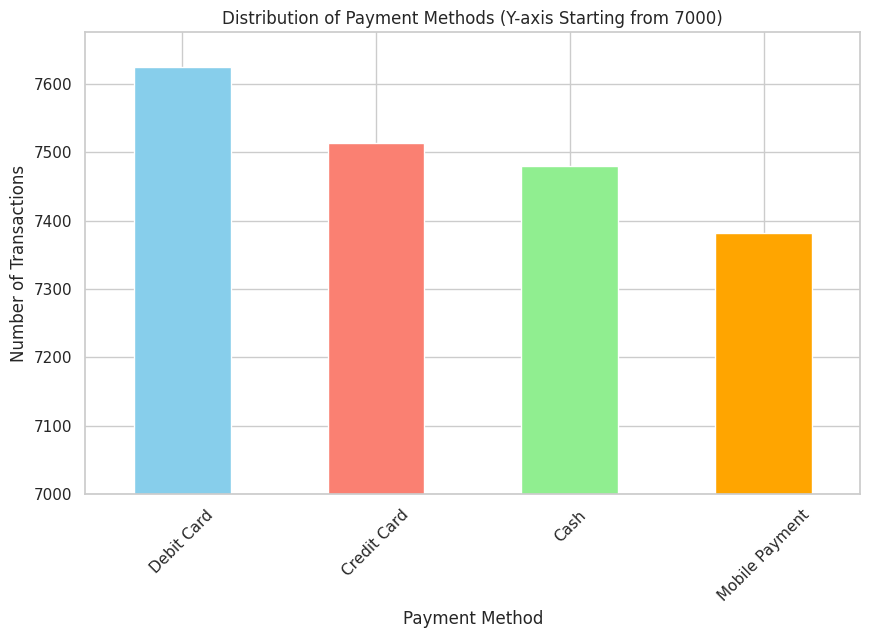

In [ ]:
#plotting the bar graph with adjusted y-axis limits
plt.figure(figsize=(10, 6))
payment_method_counts.plot(kind='bar', color=colors)
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Payment Methods (Y-axis Starting from 7000)')

#adjusting y-axis limits to emphasize the differences between payment methods
plt.ylim(7000, max(payment_method_counts) + 50)

plt.xticks(rotation=45)
plt.show()

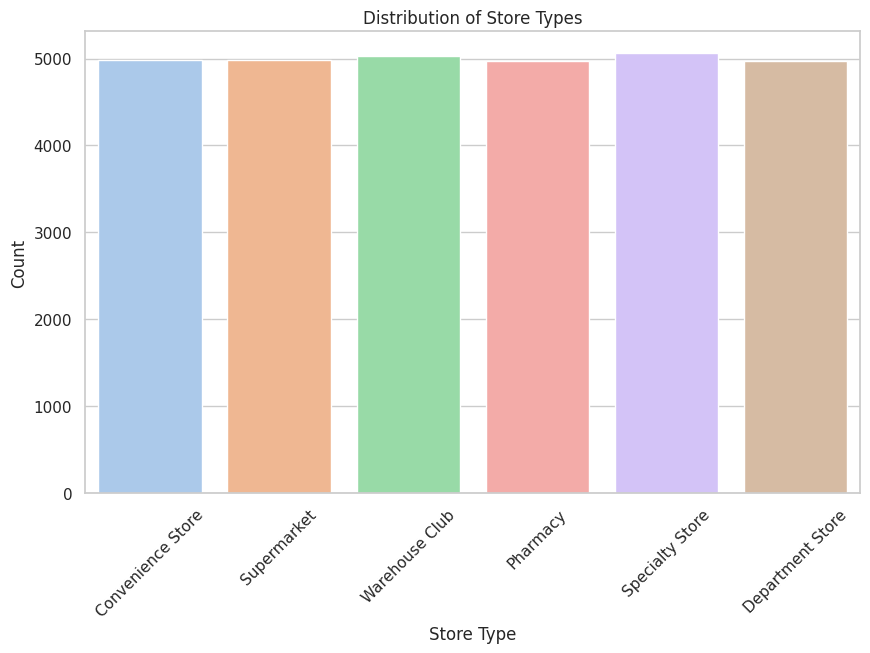

In [ ]:
#creating a basic bar graph for the distrubution of different store types
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")    #setting the seaborn grid background
sns.countplot(x='Store_Type', data=df, palette='pastel')
plt.title('Distribution of Store Types')
plt.xlabel('Store Type')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.show()

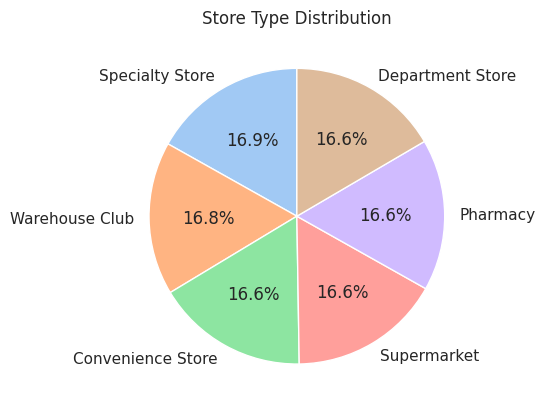

In [ ]:
#creating a basic pie chart for the distrubution of different store types
store_type_counts = df['Store_Type'].value_counts()
plt.pie(store_type_counts, labels=store_type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Store Type Distribution')
plt.show()

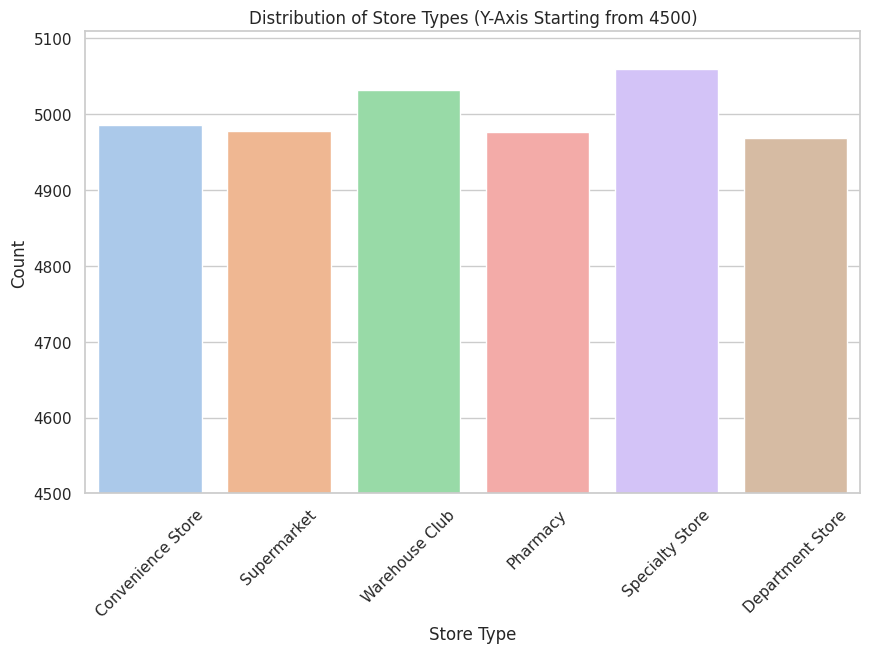

In [ ]:
#creating a basic bar graph for the distrubution of different store types
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")    #setting the seaborn grid background
sns.countplot(x='Store_Type', data=df, palette='pastel')
plt.title('Distribution of Store Types (Y-Axis Starting from 4500)')
plt.xlabel('Store Type')
plt.ylabel('Count')

#adjusting y-axis limits to emphasize the differences between the store types
plt.ylim(4500, max(df['Store_Type'].value_counts()) + 50)

plt.xticks(rotation=45)
plt.show()

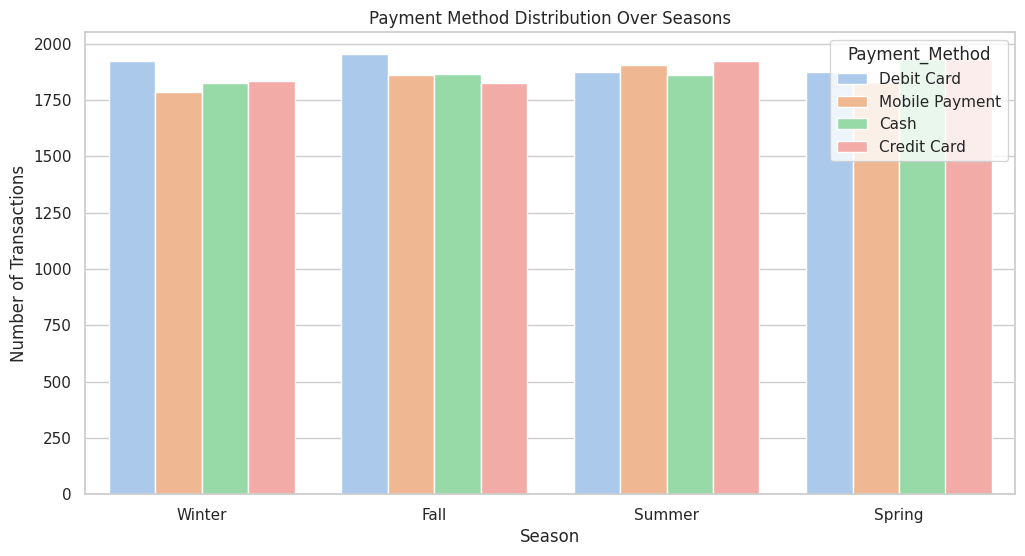

In [ ]:
#grouping data by seasons and payment methods
payment_method_counts_per_season = df.groupby(['Season', 'Payment_Method']).size().unstack(fill_value=0)
season_mapping = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4}
df['Season_Num'] = df['Season'].map(season_mapping)

#creating a countplot with enhanced visuals using the grouped data
plt.figure(figsize=(12, 6))
colors = sns.color_palette('pastel', n_colors=len(payment_method_counts_per_season.columns))
sns.countplot(x='Season', data=df, hue='Payment_Method', palette=colors)

plt.xlabel('Season')
plt.ylabel('Number of Transactions')
plt.title('Payment Method Distribution Over Seasons')
plt.show()

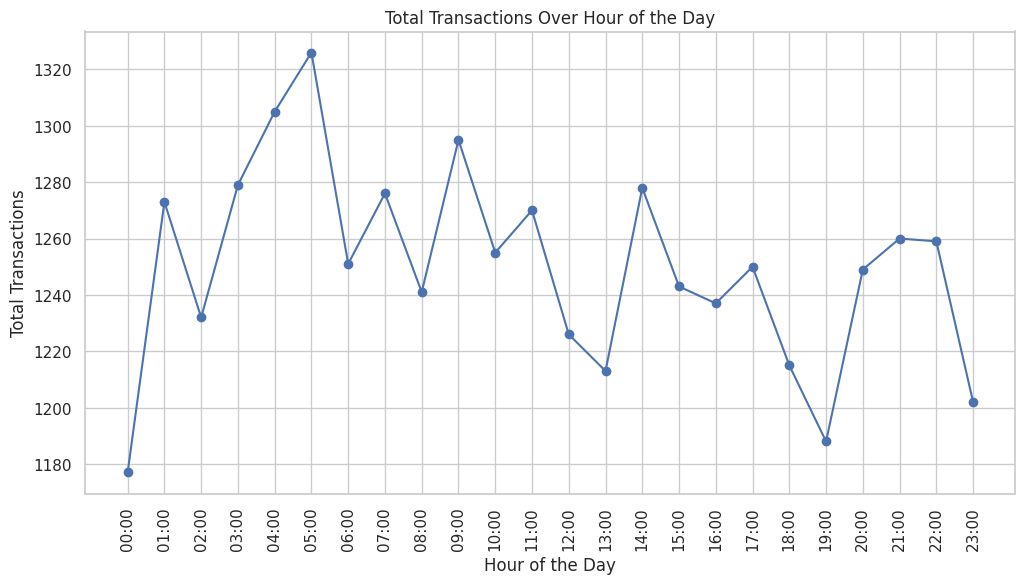

In [ ]:
#converting the existing date data into datetime format
df['Date'] = pd.to_datetime(df['Date'])

#creating a time column from the datatime data
df['Hour'] = df['Date'].dt.hour
transactions_per_hour = df.groupby('Hour')['Transaction_ID'].count().reset_index()

#creating a line graph by utilizing the time and number of transactins
plt.figure(figsize=(12, 6))
plt.plot(transactions_per_hour['Hour'], transactions_per_hour['Transaction_ID'], marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Transactions')
plt.title('Total Transactions Over Hour of the Day')

#customizing our x-axis to represent actual time (24 HR)
hour_labels = [f"{hour:02d}:00" for hour in transactions_per_hour['Hour']]
plt.xticks(transactions_per_hour['Hour'], hour_labels, rotation=90)  # Rotate x-axis labels by 90 degrees

plt.show()

Market Basket Analysis with Apriori Algorithm (ML)

In [ ]:
#importing relevant libraries
!pip install mlxtend
from ast import literal_eval
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

#surpressing deprecated warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#creating empty lists to store results
all_frequent_itemsets = []
all_association_rules = []

#defining and iterating through batch sizes to accomodate RAM constraints
batch_size = 6000
for i in range(0, len(df), batch_size):
    batch_df = df.iloc[i:i+batch_size].copy()

    #transforming the data to the format expected by mlxtend
    te = TransactionEncoder()
    te_ary = te.fit(batch_df['Product']).transform(batch_df['Product'])
    transformed_df = pd.DataFrame(te_ary, columns=te.columns_)

    #applying Apriori algorithm to the transformed dataset
    frequent_itemsets = apriori(transformed_df, min_support=0.0001, use_colnames=True)
    association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.001)

    #appending results to empty list
    all_frequent_itemsets.append(frequent_itemsets)
    all_association_rules.append(association_rules_df)

#combining and averaging the results for all batches
final_frequent_itemsets = pd.concat(all_frequent_itemsets, ignore_index=True)
final_association_rules = pd.concat(all_association_rules, ignore_index=True)
average_support = final_frequent_itemsets.groupby('itemsets')['support'].mean().reset_index()

#merging the average support back to the dataframe to sort
final_frequent_itemsets = pd.merge(final_frequent_itemsets, average_support, on='itemsets', how='left', suffixes=('_original', '_average'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#displaying the final frequent items results
print("Final Frequent Itemsets:")
final_frequent_itemsets.sort_values(by='support_average', ascending=False).drop_duplicates(subset='itemsets')

Final Frequent Itemsets:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support_original,itemsets,support_average
51913,0.069167,(Toothpaste),0.067633
51868,0.041500,(Garden Hose),0.038233
51906,0.040333,(Sponges),0.038233
20,0.039333,(Deodorant),0.037900
25772,0.035000,(Butter),0.037867
...,...,...,...
49322,0.000167,"(Salmon, Ketchup, Tomatoes, Eggs)",0.000167
49321,0.000167,"(Shrimp, Ketchup, Peanut Butter, Eggs)",0.000167
49320,0.000167,"(Shrimp, Ketchup, Pancake Mix, Eggs)",0.000167
49319,0.000167,"(Rice, Ketchup, Pancake Mix, Eggs)",0.000167


In [ ]:
#displaying the final association rules results
print("\nFinal Association Rules:")
final_association_rules.sort_values(by='confidence', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Final Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
471702,"(Insect Repellent, Butter)",(Toothbrush),0.000667,0.035833,0.000667,1.000000,27.906977,0.000643,inf,0.964810
810044,"(Feminine Hygiene Products, Plant Fertilizer, ...",(Cleaning Spray),0.000167,0.038167,0.000167,1.000000,26.200873,0.000160,inf,0.961994
810003,"(Feminine Hygiene Products, Chicken, Coffee)",(Cleaning Spray),0.000167,0.038167,0.000167,1.000000,26.200873,0.000160,inf,0.961994
810005,"(Cleaning Spray, Chicken, Coffee)",(Feminine Hygiene Products),0.000167,0.035667,0.000167,1.000000,28.037383,0.000161,inf,0.964494
810017,"(Plant Fertilizer, Chicken, Coffee)",(Cleaning Spray),0.000167,0.038167,0.000167,1.000000,26.200873,0.000160,inf,0.961994
...,...,...,...,...,...,...,...,...,...,...
75579,(Toothpaste),"(Hand Sanitizer, Toothbrush)",0.073333,0.001167,0.000167,0.002273,1.948052,0.000081,1.001109,0.525180
75561,(Toothpaste),"(Hand Sanitizer, Tomatoes)",0.073333,0.001500,0.000167,0.002273,1.515152,0.000057,1.000774,0.366906
75531,(Toothpaste),"(Hand Sanitizer, Toilet Paper)",0.073333,0.001500,0.000167,0.002273,1.515152,0.000057,1.000774,0.366906
75429,(Toothpaste),"(Hand Sanitizer, Soda)",0.073333,0.001667,0.000167,0.002273,1.363636,0.000044,1.000607,0.287770


In [ ]:
#filtering out rules with 100% confidence due to its misleading nature in small sample sizes
filtered_association_rules = final_association_rules[final_association_rules['confidence'] < 1.0]

#displaying the filtered association rules
print("\nFiltered/Sorted Association Rules:")
filtered_association_rules.sort_values(by=['zhangs_metric'], ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Filtered/Sorted Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
843335,(Potatoes),"(Pasta, Mayonnaise, Syrup)",0.033833,0.000167,0.000167,0.004926,29.556650,0.000161,1.004783,1.000000
784800,(Hand Sanitizer),"(Beef, Pasta, Rice)",0.033833,0.000167,0.000167,0.004926,29.556650,0.000161,1.004783,1.000000
784829,(Hand Sanitizer),"(Trash Bags, Toothpaste, Beef)",0.033833,0.000167,0.000167,0.004926,29.556650,0.000161,1.004783,1.000000
784939,(Potatoes),"(Insect Repellent, Beef, Tuna)",0.033833,0.000167,0.000167,0.004926,29.556650,0.000161,1.004783,1.000000
785025,(Power Strips),"(Iron, Pickles, Beef)",0.033833,0.000167,0.000167,0.004926,29.556650,0.000161,1.004783,1.000000
...,...,...,...,...,...,...,...,...,...,...
6048,(Vacuum Cleaner),(Shampoo),0.038000,0.038667,0.000167,0.004386,0.113430,-0.001303,0.965568,-0.890408
886499,(Water),(Vinegar),0.038667,0.038000,0.000167,0.004310,0.113430,-0.001303,0.966165,-0.890475
6049,(Shampoo),(Vacuum Cleaner),0.038667,0.038000,0.000167,0.004310,0.113430,-0.001303,0.966165,-0.890475
881175,(Light Bulbs),(Bread),0.038000,0.039167,0.000167,0.004386,0.111982,-0.001322,0.965066,-0.891813


Customer Segmentation using K-Means Clustering (ML)

In [ ]:
#importing relevant libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from IPython.display import display

#creating a dataframe with relevant features for segmentation
selected_features = ['Total_Items', 'Total_Cost', 'Customer_Category', 'City', 'Season', 'Store_Type', 'Promotion']
segmentation_data = df[selected_features]

#one-hot encoding categorical features and standardizing numerical features
segmentation_data = pd.get_dummies(segmentation_data, columns=['Customer_Category', 'City', 'Season', 'Store_Type', 'Promotion'])
scaler = StandardScaler()
segmentation_data[['Total_Items', 'Total_Cost']] = scaler.fit_transform(segmentation_data[['Total_Items', 'Total_Cost']])

#performing k-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
segmentation_data['Cluster'] = kmeans.fit_predict(segmentation_data)

cluster_stats = segmentation_data.groupby('Cluster')[['Total_Items', 'Total_Cost']].mean()
cluster_stats

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Total_Items,Total_Cost
Cluster,,
0,0.933510,-0.621737
1,-0.929771,-0.636574
2,-0.015044,1.057042


In [ ]:
#selecting features to explore in each cluster
features_to_explore = ['Customer_Category', 'City', 'Season', 'Store_Type', 'Promotion']

#displaying the distribution within each cluster
for feature in features_to_explore:
    cross_tab = pd.crosstab(df['Cluster'], df[feature], margins=True, margins_name='Total')

    #utilizing displays to output all the dataframes at once
    print(f"\nDistribution of {feature} within each cluster:")
    display(cross_tab)


Distribution of Customer_Category within each cluster:


Customer_Category,Homemaker,Middle-Aged,Professional,Retiree,Senior Citizen,Student,Teenager,Young Adult,Total
Cluster,,,,,,,,,
0,1426,1380,1346,1401,1400,1505,1381,1348,11187
1,1180,1189,1105,1160,1095,1193,1180,1107,9209
2,1192,1178,1187,1184,1207,1206,1219,1231,9604
Total,3798,3747,3638,3745,3702,3904,3780,3686,30000



Distribution of City within each cluster:


City,Atlanta,Boston,Chicago,Dallas,Houston,Los Angeles,Miami,New York,San Francisco,Seattle,Total
Cluster,,,,,,,,,,,
0,1098,1132,1114,1131,1136,1188,1095,1135,1057,1101,11187
1,906,911,940,897,885,977,904,887,986,916,9209
2,963,978,929,956,971,950,960,982,939,976,9604
Total,2967,3021,2983,2984,2992,3115,2959,3004,2982,2993,30000



Distribution of Season within each cluster:


Season,Fall,Spring,Summer,Winter,Total
Cluster,,,,,
0,2830,2808,2823,2726,11187
1,2282,2285,2333,2309,9209
2,2389,2472,2406,2337,9604
Total,7501,7565,7562,7372,30000



Distribution of Store_Type within each cluster:


Store_Type,Convenience Store,Department Store,Pharmacy,Specialty Store,Supermarket,Warehouse Club,Total
Cluster,,,,,,,
0,1848,1887,1850,1896,1858,1848,11187
1,1495,1527,1523,1554,1560,1550,9209
2,1643,1555,1603,1609,1560,1634,9604
Total,4986,4969,4976,5059,4978,5032,30000



Distribution of Promotion within each cluster:


Promotion,BOGO (Buy One Get One),Discount on Selected Items,None,Total
Cluster,,,,
0,3754,3734,3699,11187
1,3090,3025,3094,9209
2,3224,3182,3198,9604
Total,10068,9941,9991,30000
